# Aula 06

Nesta aula, trabalharemos com dados que variam no tempo e espaço em uma grade regular (cube data). 
Baixaremos os dados da plataforma https://disc.gsfc.nasa.gov/ e  selecionaremos os dados da concentração de CO para 2024-1. 

In [1]:
# caminho para meu arquivo
file_path = r"C:\Users\Leonardo.Hoinaski\Documents\python_env_app\dados\MERRA2_400.tavgU_2d_chm_Nx.202401.nc4"

# Abrindo o arquivo utilizando o netCDF4
import netCDF4 as nc
cubo_co = nc.Dataset(file_path, format="NETCDF4")
cubo_co


<class 'netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Contact: http://gmao.gsfc.nasa.gov
    History: Original file generated: Mon Feb 12 00:22:46 2024 GMT
    Filename: MERRA2_400.tavgU_2d_chm_Nx.202401.nc4
    Comment: GMAO filename: d5124_m2_jan10.tavg1_2d_chm_Nx.diurnal.202401.nc4
    Source: CVS tag: GEOSadas-5_12_4_p38_SLES12_M2-OPS experiment_id: d5124_m2_jan10
    Conventions: CF-1
    Institution: NASA Global Modeling and Assimilation Office
    References: http://gmao.gsfc.nasa.gov
    Format: NetCDF-4/HDF-5
    SpatialCoverage: global
    VersionID: 5.12.4
    TemporalRange: 1980-01-01 -> 2016-12-31
    identifier_product_doi_authority: http://dx.doi.org/
    ShortName: M2TUNXCHM
    RangeBeginningDate: 2024-01-01
    RangeEndingDate: 2024-01-31
    GranuleID: MERRA2_400.tavgU_2d_chm_Nx.202401.nc4
    ProductionDateTime: Original file generated: Mon Feb 12 00:22:46 2024 GMT
    LongName: MERRA2 tavg1_2d_chm_Nx: 2d,3-Hourly,Time-Averaged,Sin

In [2]:
# Analisando uma variável dentro do netCDF
cubo_co['COSC']

<class 'netCDF4.Variable'>
float32 COSC(time, lat, lon)
    long_name: CO Surface Concentration in ppbv __ENSEMBLE__
    units: 1e-9
    _FillValue: 1e+15
    missing_value: 1e+15
    fmissing_value: 1e+15
    vmax: 1e+15
    vmin: -1e+15
    valid_range: [-1.e+15  1.e+15]
unlimited dimensions: time
current shape = (24, 361, 576)
filling on

In [3]:
# Analisando uma variável dentro do netCDF
cubo_co['time'][:]

C:\Users\Leonardo.Hoinaski\AppData\Local\Temp\ipykernel_10224\2745050438.py:2: RuntimeWarning: invalid value encountered in cast
  cubo_co['time'][:]
C:\Users\Leonardo.Hoinaski\AppData\Local\Temp\ipykernel_10224\2745050438.py:2: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  cubo_co['time'][:]


masked_array(data=[   0,   60,  120,  180,  240,  300,  360,  420,  480,
                    540,  600,  660,  720,  780,  840,  900,  960, 1020,
                   1080, 1140, 1200, 1260, 1320, 1380],
             mask=False,
       fill_value=np.int64(999999),
            dtype=int32)

In [4]:
cubo_co.dimensions

{'lon': "<class 'netCDF4.Dimension'>": name = 'lon', size = 576,
 'lat': "<class 'netCDF4.Dimension'>": name = 'lat', size = 361,
 'time': "<class 'netCDF4.Dimension'>" (unlimited): name = 'time', size = 24}

In [5]:
# Determinar o shape dos dados de concentração de CO na superfície
import numpy as np
np.shape(cubo_co['COSC'][:])

(24, 361, 576)

In [6]:
# Recortando dados 3D

cubo_co['COSC'][0:10,0,0]

masked_array(data=[36.97792 , 36.976906, 36.975487, 36.974518, 36.97156 ,
                   36.96897 , 36.963974, 36.958614, 36.9536  , 36.94954 ],
             mask=False,
       fill_value=np.float64(1e+20),
            dtype=float32)

In [7]:
# Recortar para uma região
cubo_co['COSC'][0,10:20,10:20]

masked_array(
  data=[[37.356953, 37.354435, 37.353424, 37.34763 , 37.3378  ,
         37.321167, 37.306297, 37.29647 , 37.29647 , 37.29773 ],
        [37.415924, 37.398537, 37.337296, 37.280846, 37.258163,
         37.260937, 37.26144 , 37.263706, 37.263958, 37.267487],
        [37.270763, 37.218094, 37.21683 , 37.219604, 37.220108,
         37.223133, 37.22414 , 37.228172, 37.232964, 37.23548 ],
        [37.199947, 37.200703, 37.200954, 37.201965, 37.20247 ,
         37.21381 , 37.230442, 37.234726, 37.233467, 37.232964],
        [37.194405, 37.1939  , 37.194405, 37.208767, 37.230442,
         37.24052 , 37.241783, 37.242287, 37.24254 , 37.243546],
        [37.188858, 37.198437, 37.21885 , 37.22616 , 37.227165,
         37.228676, 37.230442, 37.230694, 37.23901 , 37.24783 ],
        [37.214565, 37.22061 , 37.2191  , 37.21885 , 37.217083,
         37.217083, 37.22666 , 37.238506, 37.24279 , 37.24279 ],
        [37.25186 , 37.24808 , 37.243546, 37.239513, 37.250603,
         37.270008,

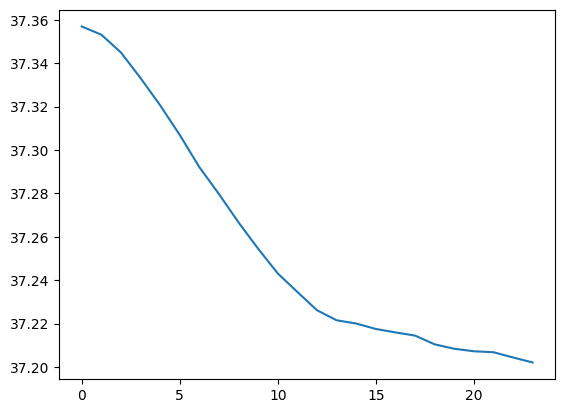

In [8]:
import matplotlib.pyplot as plt

# Plot no tempo
fig, ax = plt.subplots()
ax.plot(cubo_co['COSC'][:, 10,10])

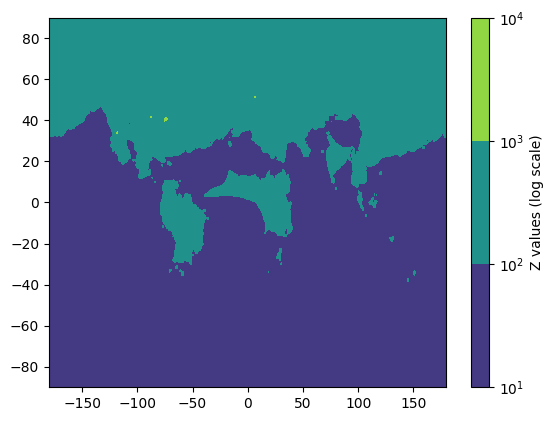

In [9]:
# plot no espaço
from matplotlib import colors

# Create the contourf plot with a logarithmic color scale
fig, ax = plt.subplots()
cs = ax.contourf(cubo_co['lon'][:], cubo_co['lat'][:], cubo_co['COSC'][0,:,:], norm=colors.LogNorm(), cmap='viridis')

# Add a colorbar
cbar = fig.colorbar(cs)
cbar.set_label('Z values (log scale)')


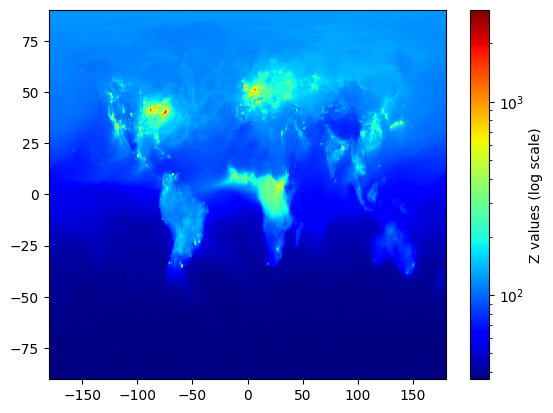

In [10]:
fig, ax = plt.subplots()
cs = ax.pcolor(cubo_co['lon'][:], cubo_co['lat'][:], cubo_co['COSC'][0,:,:], norm=colors.LogNorm(), cmap='jet')

# Add a colorbar
cbar = fig.colorbar(cs)
cbar.set_label('Z values (log scale)')

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

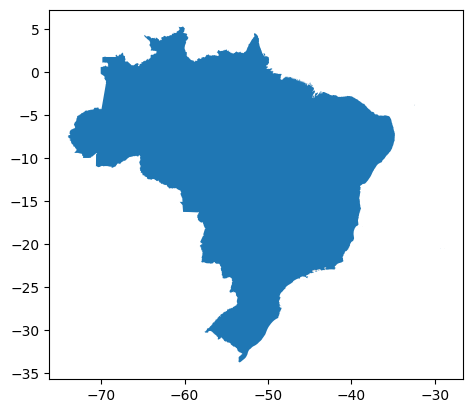

In [11]:
# Cortando para o brasil
import rioxarray
import geopandas as gpd

# Leitura do shapefile com a delimitação do BR
br = gpd.read_file(r"C:\Users\Leonardo.Hoinaski\Documents\python_env_app\dados\BR_Pais_2024\BR_Pais_2024.shp")
br.plot()
br.crs


In [12]:
import xarray as xr

co = xr.open_dataset(file_path)
co

<xarray.Dataset> Size: 140MB
Dimensions:  (time: 24, lat: 361, lon: 576)
Coordinates:
  * time     (time) datetime64[ns] 192B 2024-01-01T00:30:00 ... 2024-01-01T23...
  * lat      (lat) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 5kB -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
Data variables:
    COCL     (time, lat, lon) float32 20MB ...
    COEM     (time, lat, lon) float32 20MB ...
    COLS     (time, lat, lon) float32 20MB ...
    COPD     (time, lat, lon) float32 20MB ...
    COSC     (time, lat, lon) float32 20MB ...
    LWI      (time, lat, lon) float32 20MB ...
    TO3      (time, lat, lon) float32 20MB ...
Attributes: (12/30)
    Contact:                           http://gmao.gsfc.nasa.gov
    History:                           Original file generated: Mon Feb 12 00...
    Filename:                          MERRA2_400.tavgU_2d_chm_Nx.202401.nc4
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Source:                            CVS tag: GEOSadas-5_12_4_p38_SLES12_M2...
    Conventions:                       CF-1
    ...                                ...
    LatitudeResolution:                0.5
    LongitudeResolution:               0.625
    DataResolution:                    0.5 x 0.625
    identifier_product_doi:            10.5067/5KFZ6GXRHZKN
    RangeBeginningTime:                00:00:00.000000
    RangeEndingTime:                   23:59:59.000000

In [13]:
# Extraindo o CRS do meu dado matricial
crs = co.rio.crs
print(crs)

None


In [14]:
#Forçando a implementação de um CRS no meu array
co.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
co.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset> Size: 140MB
Dimensions:      (time: 24, lat: 361, lon: 576)
Coordinates:
  * time         (time) datetime64[ns] 192B 2024-01-01T00:30:00 ... 2024-01-0...
  * lat          (lat) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * lon          (lon) float64 5kB -180.0 -179.4 -178.8 ... 178.1 178.8 179.4
    spatial_ref  int64 8B 0
Data variables:
    COCL         (time, lat, lon) float32 20MB ...
    COEM         (time, lat, lon) float32 20MB ...
    COLS         (time, lat, lon) float32 20MB ...
    COPD         (time, lat, lon) float32 20MB ...
    COSC         (time, lat, lon) float32 20MB ...
    LWI          (time, lat, lon) float32 20MB ...
    TO3          (time, lat, lon) float32 20MB ...
Attributes: (12/30)
    Contact:                           http://gmao.gsfc.nasa.gov
    History:                           Original file generated: Mon Feb 12 00...
    Filename:                          MERRA2_400.tavgU_2d_chm_Nx.202401.nc4
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Source:                            CVS tag: GEOSadas-5_12_4_p38_SLES12_M2...
    Conventions:                       CF-1
    ...                                ...
    LatitudeResolution:                0.5
    LongitudeResolution:               0.625
    DataResolution:                    0.5 x 0.625
    identifier_product_doi:            10.5067/5KFZ6GXRHZKN
    RangeBeginningTime:                00:00:00.000000
    RangeEndingTime:                   23:59:59.000000

In [15]:
# Recortando
clipped = co.rio.clip(br.to_crs(crs='4326').buffer(0.1), 'EPSG:4326', drop=True)

C:\Users\Leonardo.Hoinaski\AppData\Local\Temp\ipykernel_10224\3996105301.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  clipped = co.rio.clip(br.to_crs(crs='4326').buffer(0.1), 'EPSG:4326', drop=True)


In [16]:
clipped

<xarray.Dataset> Size: 4MB
Dimensions:      (lon: 73, lat: 78, time: 24)
Coordinates:
  * lon          (lon) float64 584B -73.75 -73.12 -72.5 ... -30.0 -29.38 -28.75
  * lat          (lat) float64 624B -33.5 -33.0 -32.5 -32.0 ... 3.5 4.0 4.5 5.0
  * time         (time) datetime64[ns] 192B 2024-01-01T00:30:00 ... 2024-01-0...
    spatial_ref  int64 8B 0
Data variables:
    COCL         (time, lat, lon) float32 547kB nan nan nan nan ... nan nan nan
    COEM         (time, lat, lon) float32 547kB nan nan nan nan ... nan nan nan
    COLS         (time, lat, lon) float32 547kB nan nan nan nan ... nan nan nan
    COPD         (time, lat, lon) float32 547kB nan nan nan nan ... nan nan nan
    COSC         (time, lat, lon) float32 547kB nan nan nan nan ... nan nan nan
    LWI          (time, lat, lon) float32 547kB nan nan nan nan ... nan nan nan
    TO3          (time, lat, lon) float32 547kB nan nan nan nan ... nan nan nan
Attributes: (12/30)
    Contact:                           http://gmao.gsfc.nasa.gov
    History:                           Original file generated: Mon Feb 12 00...
    Filename:                          MERRA2_400.tavgU_2d_chm_Nx.202401.nc4
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Source:                            CVS tag: GEOSadas-5_12_4_p38_SLES12_M2...
    Conventions:                       CF-1
    ...                                ...
    LatitudeResolution:                0.5
    LongitudeResolution:               0.625
    DataResolution:                    0.5 x 0.625
    identifier_product_doi:            10.5067/5KFZ6GXRHZKN
    RangeBeginningTime:                00:00:00.000000
    RangeEndingTime:                   23:59:59.000000

C:\Users\Leonardo.Hoinaski\AppData\Local\Temp\ipykernel_10224\276268981.py:4: RuntimeWarning: Mean of empty slice
  ax.pcolor(clipped.lon,clipped.lat,np.nanmean(clipped['COSC'][:], axis=0))


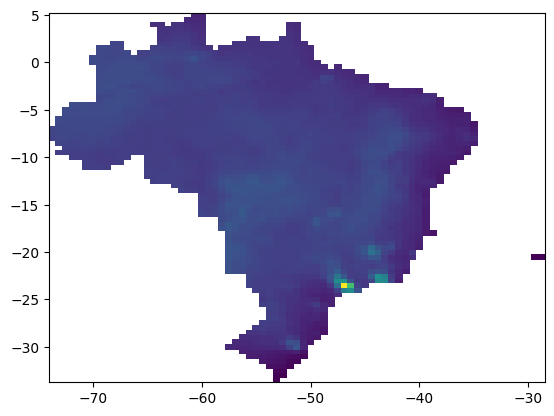

In [17]:
# Plotagem

fig, ax = plt.subplots()
ax.pcolor(clipped.lon,clipped.lat,np.nanmean(clipped['COSC'][:], axis=0))

In [18]:
# Estatísticas no tempo espaço

np.nanmean(clipped['COSC'][:], axis=1)

C:\Users\Leonardo.Hoinaski\AppData\Local\Temp\ipykernel_10224\1158903793.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(clipped['COSC'][:], axis=1)


array([[115.6178  , 117.414894, 117.85539 , ...,        nan,  49.506905,
         48.89551 ],
       [120.13888 , 121.981514, 122.62317 , ...,        nan,  49.526802,
         48.845604],
       [124.22726 , 126.21603 , 127.097305, ...,        nan,  49.538746,
         48.806385],
       ...,
       [102.61786 , 104.60432 , 105.2358  , ...,        nan,  49.43288 ,
         49.00395 ],
       [106.109215, 108.21905 , 108.668655, ...,        nan,  49.501774,
         48.99522 ],
       [110.91689 , 112.82727 , 113.26021 , ...,        nan,  49.550884,
         48.956882]], shape=(24, 73), dtype=float32)

C:\Users\Leonardo.Hoinaski\AppData\Local\Temp\ipykernel_10224\3827805101.py:3: RuntimeWarning: Mean of empty slice
  ax.plot(np.nanmean(np.nanmean(clipped['COSC'][:], axis=1),axis=1))


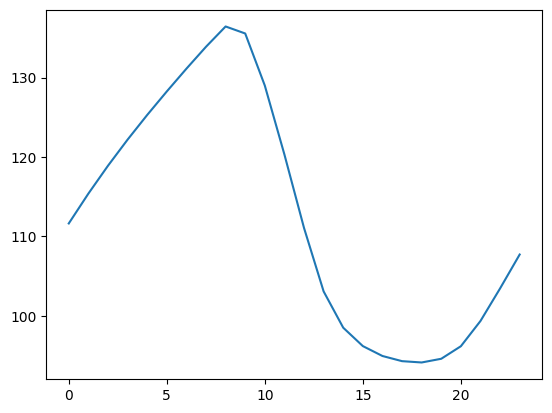

In [19]:
# Plotando
fig, ax = plt.subplots()
ax.plot(np.nanmean(np.nanmean(clipped['COSC'][:], axis=1),axis=1))

In [20]:
# Abrindo diversos netCDF
import os
allfiles = os.listdir(r"C:\Users\Leonardo.Hoinaski\Documents\python_env_app\dados")
files = [ fname for fname in allfiles if fname.endswith('.nc4')]
files

['MERRA2_400.tavgU_2d_chm_Nx.202401.nc4',
 'MERRA2_400.tavgU_2d_chm_Nx.202402.nc4']

In [22]:
# Movendo para o diretório com dados
import dask
os.chdir(r"C:\Users\Leonardo.Hoinaski\Documents\python_env_app\dados")
ds = xr.open_mfdataset(files, concat_dim='time',combine='nested')
ds

<xarray.Dataset> Size: 279MB
Dimensions:  (time: 48, lat: 361, lon: 576)
Coordinates:
  * time     (time) datetime64[ns] 384B 2024-01-01T00:30:00 ... 2024-02-01T23...
  * lat      (lat) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 5kB -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
Data variables:
    COCL     (time, lat, lon) float32 40MB dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    COEM     (time, lat, lon) float32 40MB dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    COLS     (time, lat, lon) float32 40MB dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    COPD     (time, lat, lon) float32 40MB dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    COSC     (time, lat, lon) float32 40MB dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    LWI      (time, lat, lon) float32 40MB dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    TO3      (time, lat, lon) float32 40MB dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
Attributes: (12/30)
    Contact:                           http://gmao.gsfc.nasa.gov
    History:                           Original file generated: Mon Feb 12 00...
    Filename:                          MERRA2_400.tavgU_2d_chm_Nx.202401.nc4
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Source:                            CVS tag: GEOSadas-5_12_4_p38_SLES12_M2...
    Conventions:                       CF-1
    ...                                ...
    LatitudeResolution:                0.5
    LongitudeResolution:               0.625
    DataResolution:                    0.5 x 0.625
    identifier_product_doi:            10.5067/5KFZ6GXRHZKN
    RangeBeginningTime:                00:00:00.000000
    RangeEndingTime:                   23:59:59.000000

In [26]:
# Criando lista para downloads
file_to_download = 'https://goldsmr4.gesdisc.eosdis.nasa.gov/data/MERRA2_DIURNAL/M2TUNXCHM.5.12.4/2024/MERRA2_400.tavgU_2d_chm_Nx.2024' 

files = []
for ii in range(1,31):
    files.append(file_to_download + str(ii).zfill(2) + '.nc4' )



In [30]:
# Download files
# import requests

# # Directory to save the downloaded files (create if it doesn't exist)
# download_directory = "downloaded_files"
# os.makedirs(download_directory, exist_ok=True)

# for url in files:
#     try:
#         response = requests.get(url, stream=True) # Use stream=True for large files
#         response.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)

#         # Extract filename from the URL
#         filename = os.path.join(download_directory, os.path.basename(url))

#         with open(filename, 'wb') as f:
#             for chunk in response.iter_content(chunk_size=8192): # Download in chunks
#                 f.write(chunk)
#         print(f"Downloaded: {filename}")

#     except requests.exceptions.RequestException as e:
#         print(f"Error downloading {url}: {e}")
        
#ds = xr.open_mfdataset(files, concat_dim='time',combine='nested')

Error downloading https://goldsmr4.gesdisc.eosdis.nasa.gov/data/MERRA2_DIURNAL/M2TUNXCHM.5.12.4/2024/MERRA2_400.tavgU_2d_chm_Nx.202401.nc4: 401 Client Error: Unauthorized for url: https://urs.earthdata.nasa.gov/oauth/authorize/?scope=uid&app_type=401&client_id=e2WVk8Pw6weeLUKZYOxvTQ&response_type=code&redirect_uri=https%3A%2F%2Fgoldsmr4.gesdisc.eosdis.nasa.gov%2Fdata-redirect&state=aHR0cHM6Ly9nb2xkc21yNC5nZXNkaXNjLmVvc2Rpcy5uYXNhLmdvdi9kYXRhL01FUlJBMl9ESVVSTkFML00yVFVOWENITS41LjEyLjQvMjAyNC9NRVJSQTJfNDAwLnRhdmdVXzJkX2NobV9OeC4yMDI0MDEubmM0
Error downloading https://goldsmr4.gesdisc.eosdis.nasa.gov/data/MERRA2_DIURNAL/M2TUNXCHM.5.12.4/2024/MERRA2_400.tavgU_2d_chm_Nx.202402.nc4: 401 Client Error: Unauthorized for url: https://urs.earthdata.nasa.gov/oauth/authorize/?scope=uid&app_type=401&client_id=e2WVk8Pw6weeLUKZYOxvTQ&response_type=code&redirect_uri=https%3A%2F%2Fgoldsmr4.gesdisc.eosdis.nasa.gov%2Fdata-redirect&state=aHR0cHM6Ly9nb2xkc21yNC5nZXNkaXNjLmVvc2Rpcy5uYXNhLmdvdi9kYXRhL01FUlJBM

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x00000206F7AF5BE0>>
Traceback (most recent call last):
  File "C:\Users\Leonardo.Hoinaski\Documents\python_env_app\venv\Lib\site-packages\ipykernel\ipkernel.py", line 796, in _clean_thread_parent_frames
    active_threads = {thread.ident for thread in threading.enumerate()}
  File "C:\Users\Leonardo.Hoinaski\AppData\Local\Programs\Python\Python313\Lib\threading.py", line 1477, in enumerate
    def enumerate():
KeyboardInterrupt: 


KeyboardInterrupt: 